In [138]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/extenciones')
from extenciones import Utils2 as ut

In [139]:
sns.set(style='dark', palette='dark', font="Verdana", font_scale=1)

# Carga de datos y copias de seguridad

Se hacen ajustes de Variables para dummies.

In [140]:

data = ut.load_from_csv( ut , "data_exploratoria.csv")
dataEXP = data.copy(deep = True)
dataexp = dataEXP.drop(columns = ["Unnamed: 0"])


In [141]:
dataexp.head(2)

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved


In [142]:
dataexp = pd.get_dummies(dataexp ,columns = ["Contract" ,"Senior Citizen" , "Gender", "Partner", "Dependents", 
"Phone Service" , "Multiple Lines", "Online Security" , "Online Backup" , "Device Protection" , "Tech Support" ,
"Streaming TV" ,"Paperless Billing","Internet Service", "Streaming Movies"] , drop_first= False)
dataexp.head(2)

,City,Tenure Months,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,Contract_Month-to-month,...,Streaming TV_No internet service,Streaming TV_Yes,Paperless Billing_No,Paperless Billing_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes
0,Los Angeles,2,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,1,...,0,0,0,1,1,0,0,1,0,0
1,Los Angeles,2,Electronic check,70.70,151.65,1,67,2701,Moved,1,...,0,0,0,1,0,1,0,1,0,0


# Analisis de correlación

C:\Users\DELL\AppData\Local\Temp\ipykernel_18264\3835374843.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataexp.corr()['Churn Value'].sort_values(ascending=True).plot(kind='bar',grid=True ,


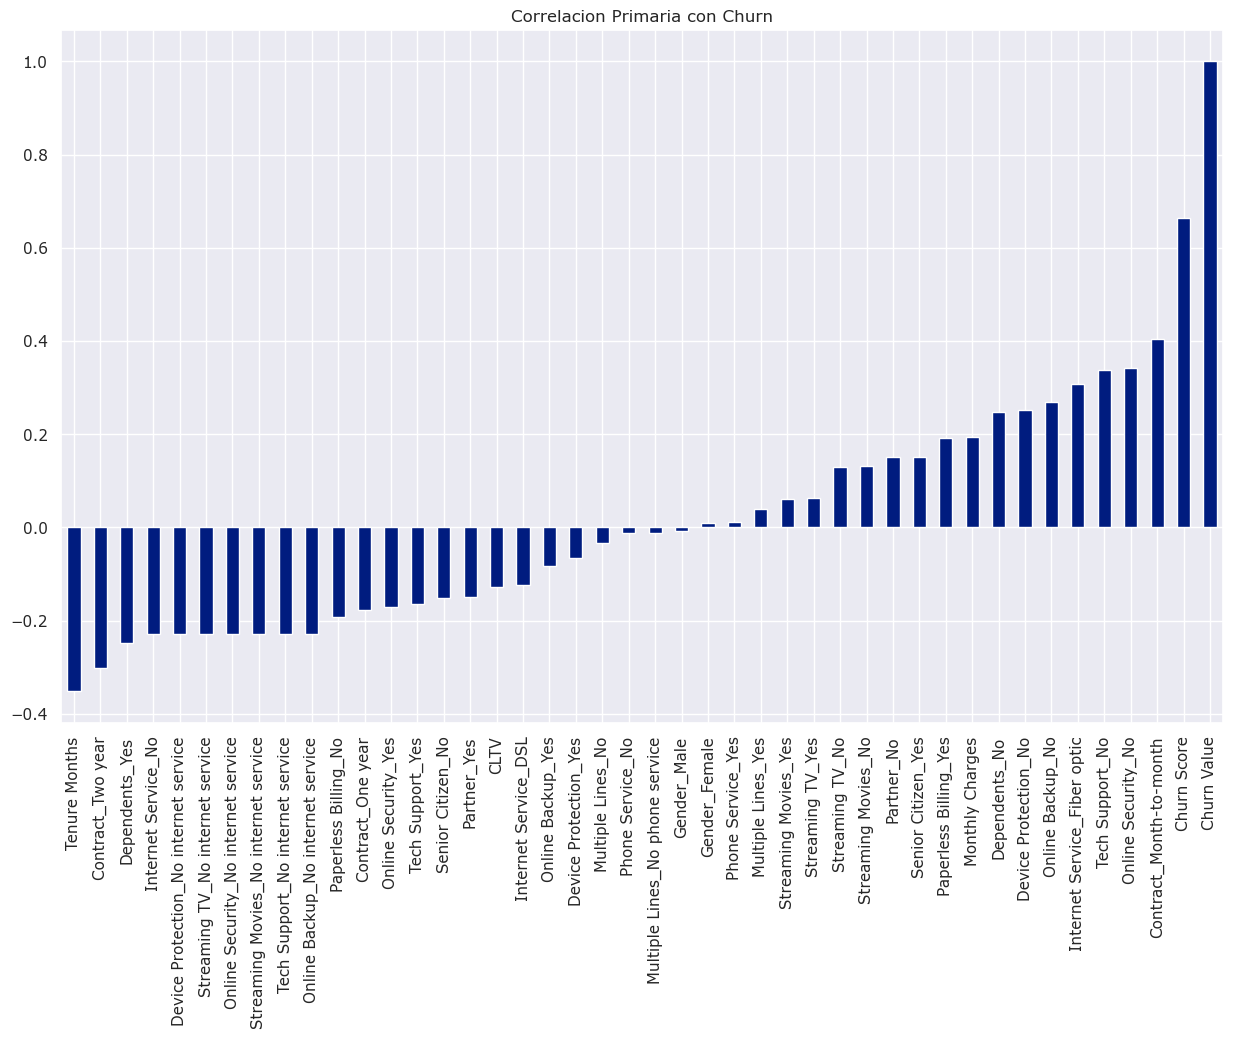

In [143]:
fig = plt.figure(figsize=(15,9))
# que tan correlacionados estan con el churn de manera asendente ordenada de tipo barra 
dataexp.corr()['Churn Value'].sort_values(ascending=True).plot(kind='bar',grid=True ,
title= "Correlacion Primaria con Churn")
plt.show()

# Correlaciones a primera vista:

Retencion:
    
    -Las variables relacionadas con altas niveles de tiempo estan negativamente correlacionads con el churn, o lo que es igual, positivamente corelacionads con la retencion de clientes: 
    tales como los contratos largos 
    
    -Tener dependientes: podemos analizar cual es el numero de dependientes clave para la retención
    
    -Las personas que no tienen servicio de Internet y que no tienen servicios extras - 
    
    -En general a las personas a las que no se les ha tenido que dar soporte tecnico


Churn
    
    -Las personas que contratan en plazos de mes a mes, tienen mayor posibilidad = .41
    
    -El servicio de fibra optica esta corelacionado negativamente .36
    
    -los cargos mensuales = .19
    
    -Asi como las personas que elijen facturar sin papel: podemos encontrar un causal detonante = .19
    
    -Si las personas tienen mas de 65 años = .17

# Analisis y ploteo de variables unicas 

Dividimos las variables para mejor vista:

    1.- Las que cargan rapido en funcionan visualmente en X
    
    2.- Las que cargan rapido y funcionan visualmente meojor en Y
    
    3.- Las variables mas densas 

In [144]:
lista_rapida = ["Senior Citizen_Yes","Gender_Male","Dependents_Yes","Phone Service_Yes","Multiple Lines_Yes","Online Security_Yes",
"Online Backup_Yes","Tech Support_Yes","Streaming TV_Yes","Contract_One year","Contract_Two year",
"Paperless Billing_Yes","Internet Service_DSL","Internet Service_Fiber optic","Internet Service_No","Streaming Movies_Yes","Streaming Movies_No internet service",]

plotvolteado = ["Churn Reason", "Payment Method", ]

lista_densa = ["Monthly Charges","Tenure Months", ]

Definimos las funciones e iteramos los plots mediante listas:

In [145]:
def plot_categorialX(column):
    fig = plt.figure(figsize=(5,5))
    sns.countplot(data=dataexp, x=column, hue='Churn Value')
    plt.show()

In [146]:
def plot_categorialY(column):
    fig = plt.figure(figsize=(8,11))
    sns.countplot(data=dataexp, y=column, hue='Churn Value')
    plt.show()

In [147]:
def plot_categorialSpecial(column):
    fig = plt.figure(figsize=(50,10))
    sns.displot(data=dataexp, x=column, fill = True,hue= "Churn Value",kind="kde", bw_adjust=.1)
    plt.show()


# Ploteamos las variables

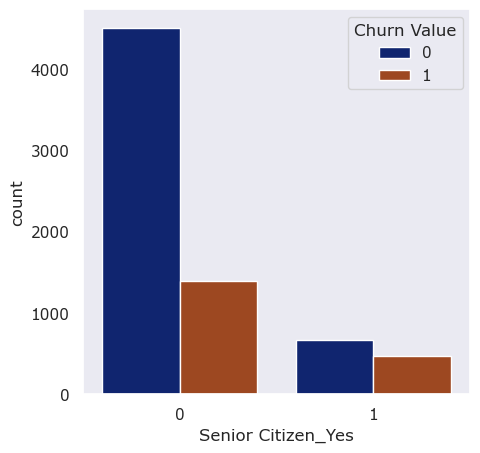

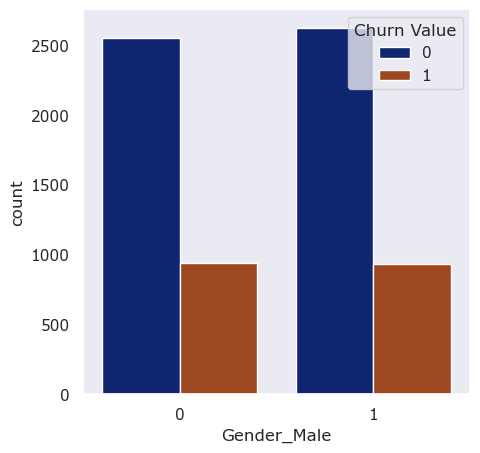

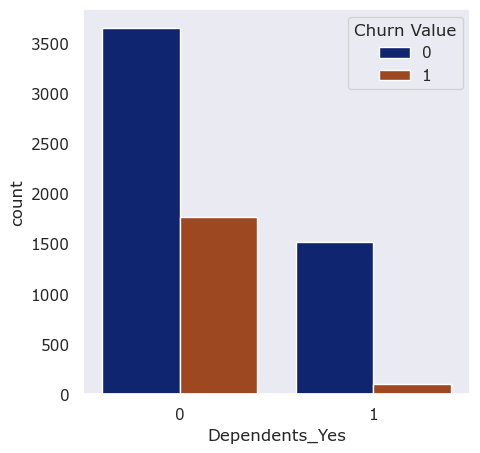

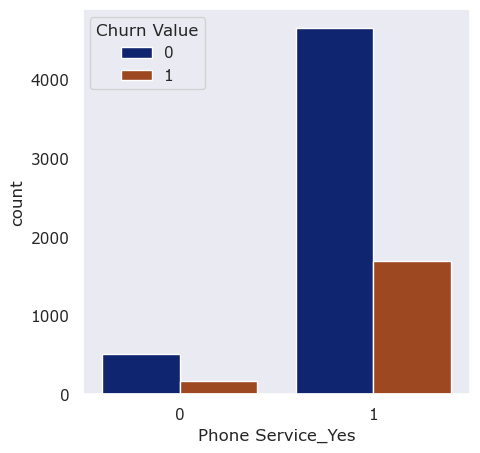

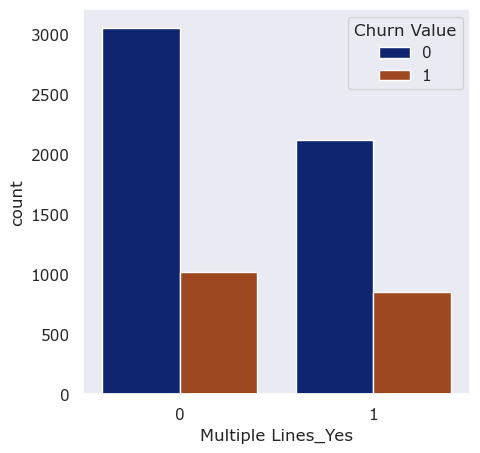

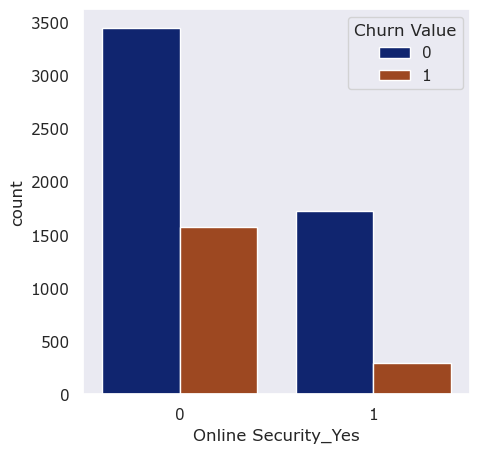

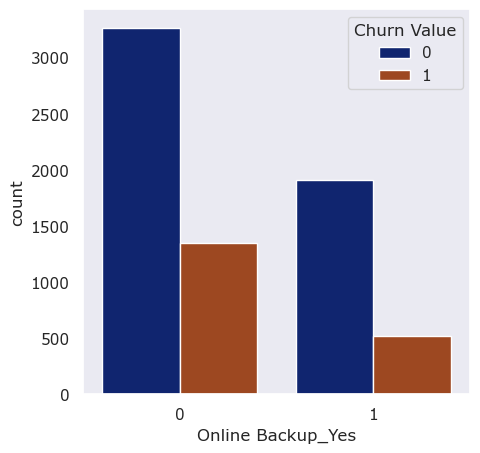

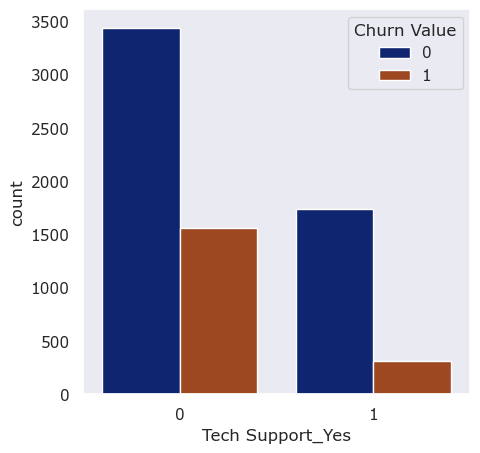

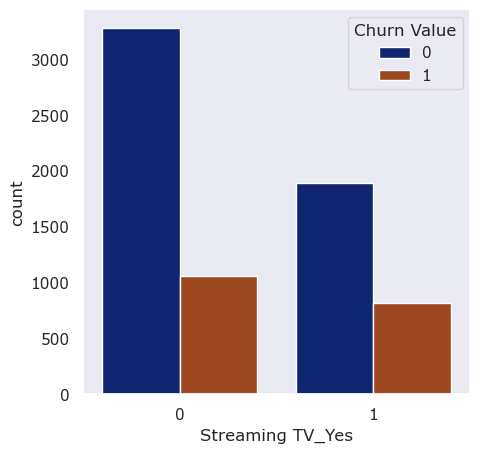

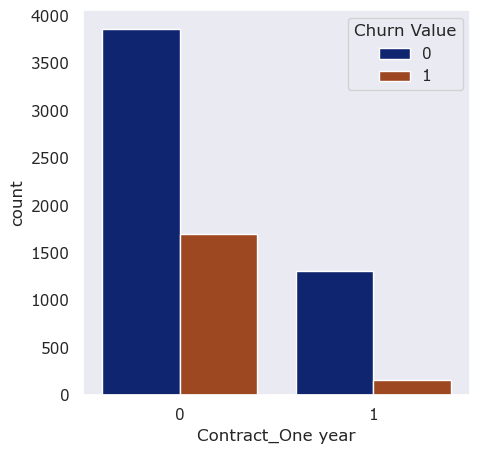

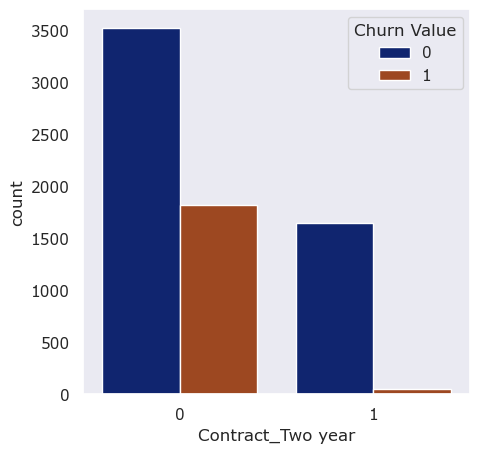

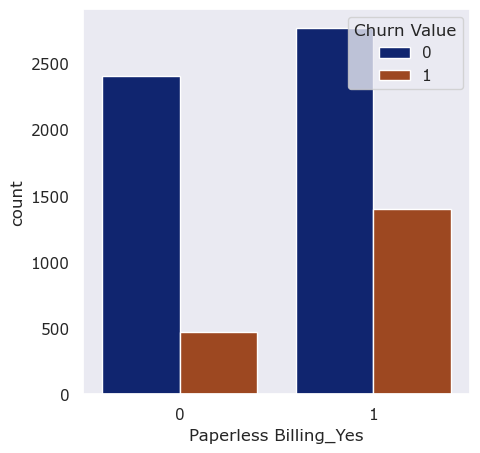

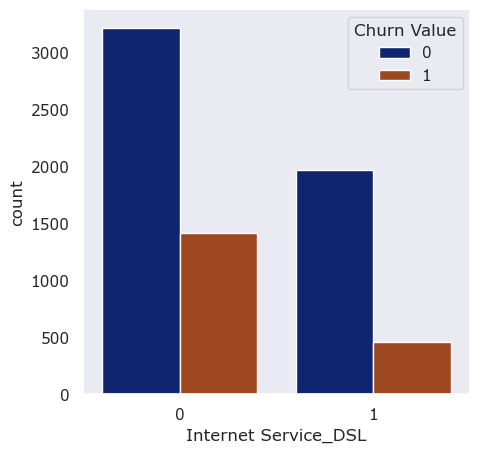

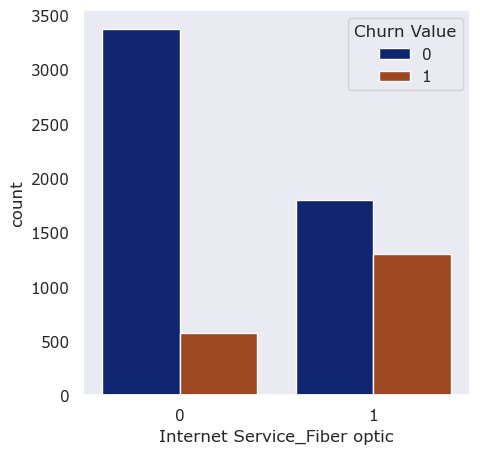

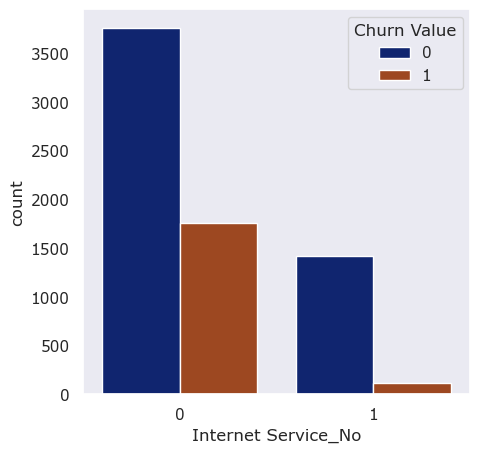

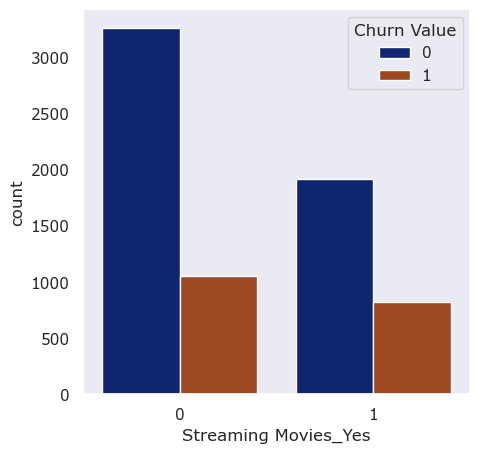

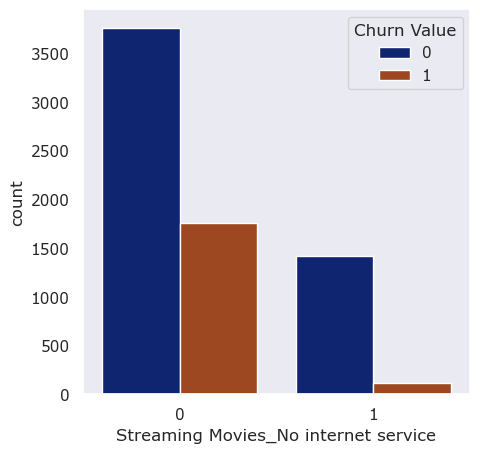

In [148]:
for var in lista_rapida:
    plot_categorialX(var)

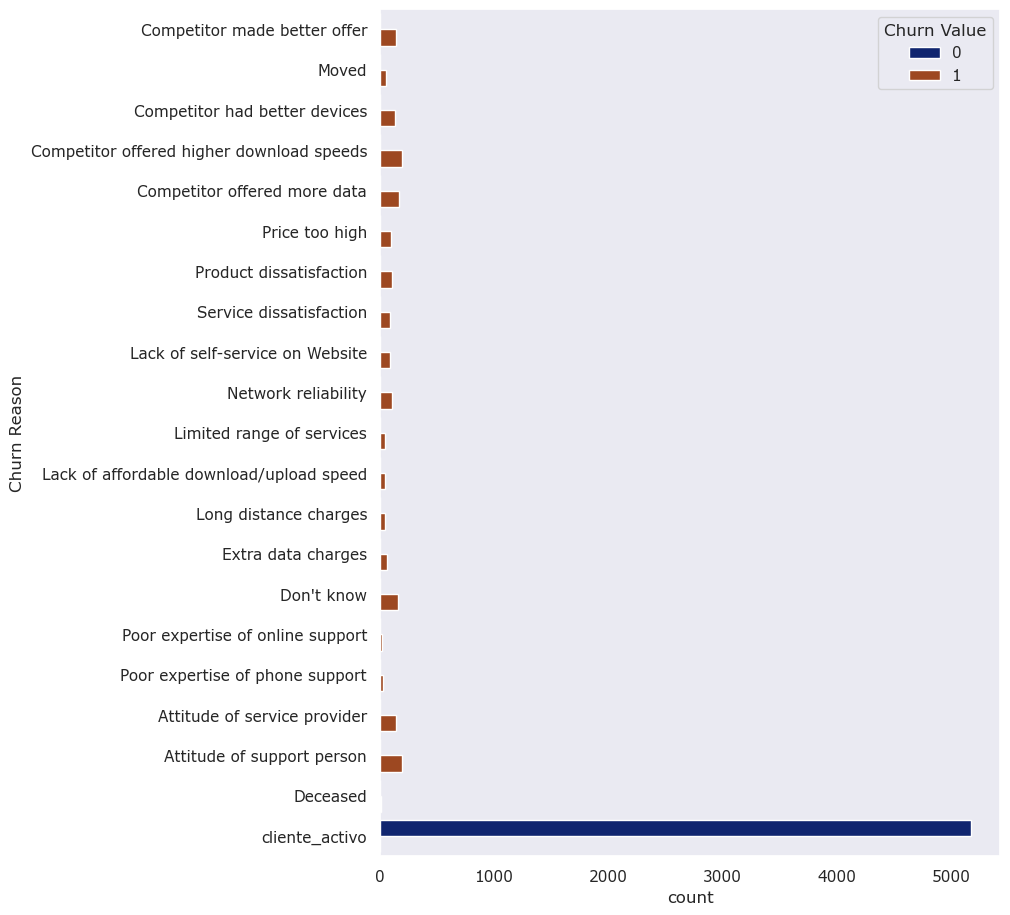

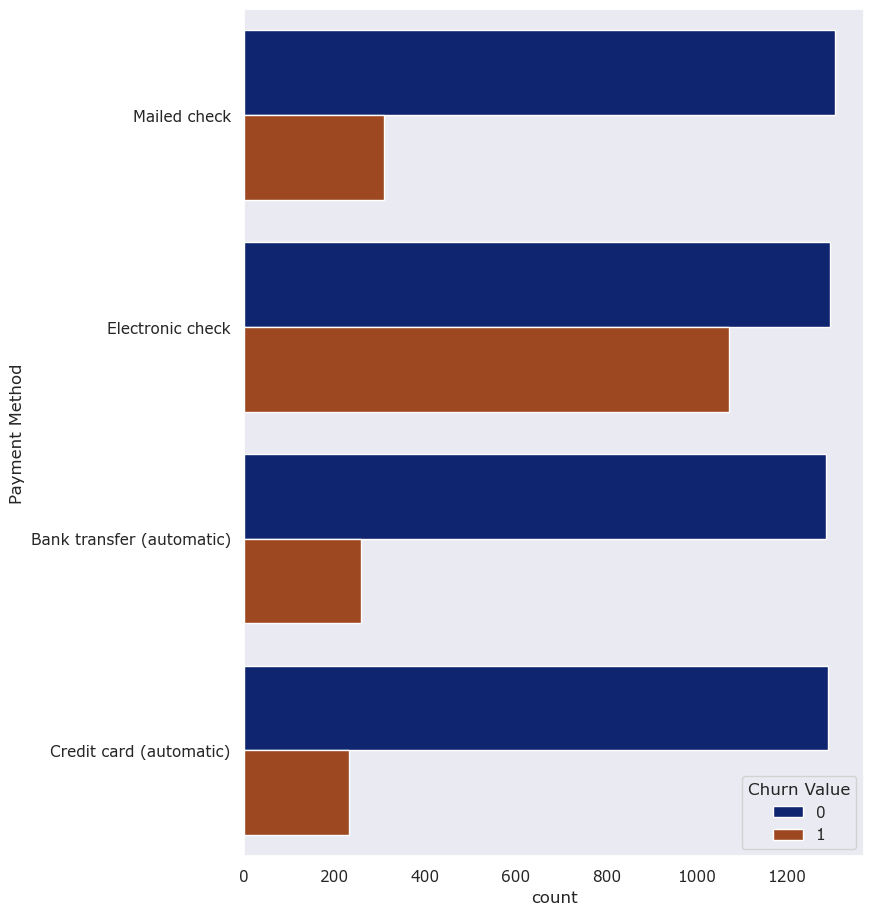

In [149]:
for var in plotvolteado:
    plot_categorialY(var)

<Figure size 5000x1000 with 0 Axes>

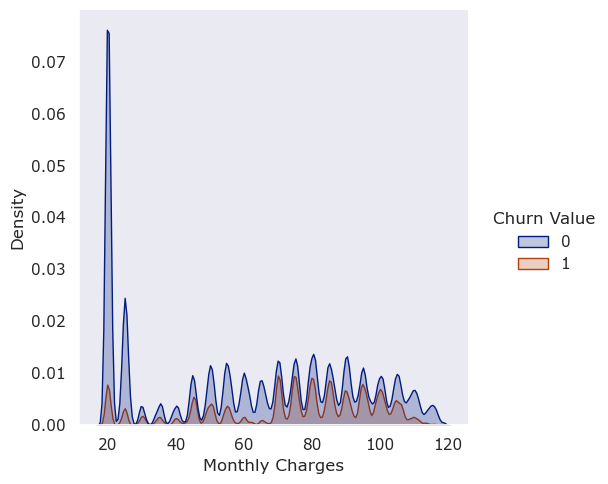

<Figure size 5000x1000 with 0 Axes>

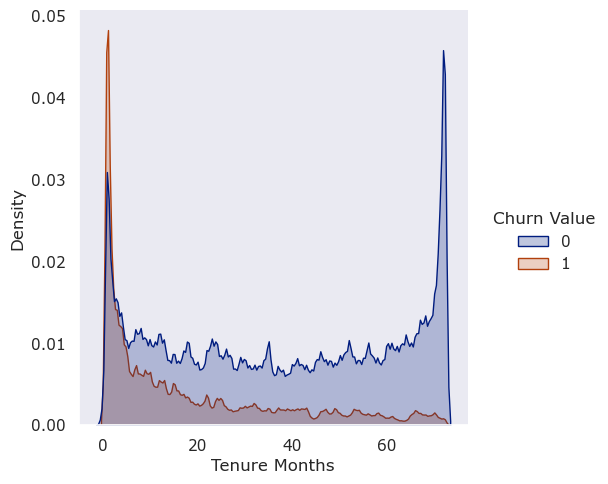

In [150]:
for var in lista_densa:
    plot_categorialSpecial(var)

# Analisis Churn 1.1.0

#**Razones por las cuales se retirarón:**
__PrimerNivel:__
(Critico)

    -Mejor oferta de la competencia, 
    -Mejor velocidad de descarga por parte del competidor 
    -Competencia ofrece mas datos 
    -Actitud de provedor de servicios
    -Actitud del personal de soporte.

__En segundo nivel estan:__ 
    
    -Precio alto 
    -Cambio de domicilio 
    -Insatisfaccion del producto y servicio
    -Lack of self-servicie on Website 
    -Netwok reliability.

__Y en tercer nivel:__

    -Cargos extra de datos 
    -Cargos de larga distancia 
    -Lack of affordable download speed 
    -Rango de servicios limitados.


## Categorias :

**Senior Citizen :** 
Las personas que no son mayores de 65 años tienen una tendencia a quedarse, en porcentaje

**Genero:**
El genero esta sumamente balanceado tanto de las personas que van como de las personas que se quedan, no es reelevante que sean hombres o mujeres.

**Dependientes :** 
Tenemos a muchoas mas clientes que no tienen dependientes, cerca del 30% pero nos deja el 45% de ellos, en cambio los clientes que si tienen dependientes son mas fieles, y tienen alrededor de un 5% de abandono.(Analisis profundo)

**Servicio de telefono:** 
Aunque tenemos mas clientes con servicio de telefono vemos que en % el churn es similar.

**Multiples lineas:** 
Clientes con multiples lineas son mas propensos a dejarnos.

**Seguridad Online:**
En % son mas las personas que no cuentan con seguridad online, y las personas que si lo tienen son mas propensas a seguir como clientes(Analisis profundo).

**Online Backup:** 
Similar a seguridad online aunque en menos medida.

**Soporte tecnico:** 
Son mas lo clientes que no lo solicitan, pero los que si lo hacen, tienden a dejarnos menos, una hipotesis es que no todos los clientes reportan las fallas, dado que en un acto normal, la grafica tendria que estar balanceada(Analizar cuales son las fallas que mas se reportan).

**Streming TV:** 
Las personas que utilizan el servicio de estreaming probablemente se quejen mas(posterior analisis con scaterplot junto con soporte tecnico ).

**Contratos por año y dos años:** 
Aunque pareseca obvio por ser dato trimestral, podemos analizar que tener contratos largos recurre en un mejor desempeño.

**Facturación sin papel :** 
Las personas que facturan sin papel tienden mas a irse, tendriamos que analizar si podemos controlar eso o a que se debe haciendo un analisis de campo cualitativo.

**DSL servicio de internet:** 
Vemos que la grafica esta medianamente balanceada aunque son varios clientes casi 1500

**Servicio de fibra optica :** 
Podemos ver que la cantidad de clientes que se fueron teniendo fibra optica es(tenemos que ver que esta pasando con el servicio de fibra optima, y ver si es que esta fallando)

**Personas que no tienen servicio de internet:** 
Las personas que no tienen este servicio, general se han quedado, lo que significa que las personas que si han tenido servicio de internet en general tienden a irse, (Revisar Fallas de fibra optica)

**Utilizan servicio de estreaming:** 
En % son menos las los clientes que lo usan pero de los que si, casi un 40% nos dejaron, (habria que ver la fibra optica)

**Streaming movies y no tienen servicio de internet:** 
Las personas sin servicio de internet(nuestro) pero que si ven peliculas en streaming, tienden a quedarse, en cambio las que si lo ven con nuestro servicio tienden a irse.


**El tipo de pago que nos esta ejando sin clientes es el cheque electronico.**

__Los cargos mensuales__ : 
Es normal que los cargos exesivos, alejen a las personas pero, aunque las distribuciones se mantienen normales dentro de un promedio , cuando los cargos pasan de 65 tenemos una alta tasa de churn, es importante ver los cargos y analizamos que el promedio de churn se dispara al doble cuando los cargos estan por encima de 65 dolares.

**Cantidad de meses**
Vemos que entre mas meses a permanecido con nosotros, mayor probabilidad tenenmos de que no nos deje, quiza independientemente de los cargos o las fallas de la empresa, osea la fidelidad.

# Analisis 2.0.1


Para esto usaremos de base el analisis 1.1.0 y Comenzaremos a ver si las variables se relacionan entre si para posteriormente hacer analisis multivariable.

Lo primero que llama la atención es el debalance que exite en fibra optima vs el balance DSL.

Creamos el respaldo y comenzamos a trabajar con mascaras para dividir los datos de Churn y retención

In [151]:
respaldo = dataexp.copy(deep = True)
respaldo2 = dataexp.copy(deep = True)

dataCompleta1 = data.copy(deep = True)
dataCompleta2 = data.copy(deep = True)
dataC = data.copy(deep = True)

mask1 = respaldo['Churn Value'] == 1
mask2 = respaldo2['Churn Value'] == 0

mascaracompleta1 = dataCompleta1['Churn Value'] == 1
mascaracompleta2 = dataCompleta2['Churn Value'] == 0

df_activo = respaldo.drop(respaldo[mask1].index)
df_inactivo = respaldo2.drop(respaldo2[mask2].index)

in_Comleto = dataCompleta1.drop(dataCompleta1[mascaracompleta1].index)
a_Completo = dataCompleta2.drop(dataCompleta2[mascaracompleta2].index)

# creamos un set de estilos
sns.set(style='white', palette='bright', font="Verdana", font_scale=1)

# Analizando Fibra Optica
**Sabemos que el tipo de pago "Electronic Check" a tenido fallas y que ademas la fibra optica tiene alta relacion con el churn, 
asi que analizamos los datos y vemos que la mayoria de clientes que tienen fibra optica pagan con cheque electronico.**

Podemos observar que los clientes que pagan la fibra optica con cheque electronico, en general son la mayoria tanto como para los que siguen con nosotros, como los que no, ademas vemos que la gran mayoria de clientes que nos abandonaron pagaban la fibra optica con cheque electronico.

<AxesSubplot: title={'center': 'Clientes Inactivos : tipo de pago de fibra optica'}, xlabel='Internet Service_Fiber optic', ylabel='count'>

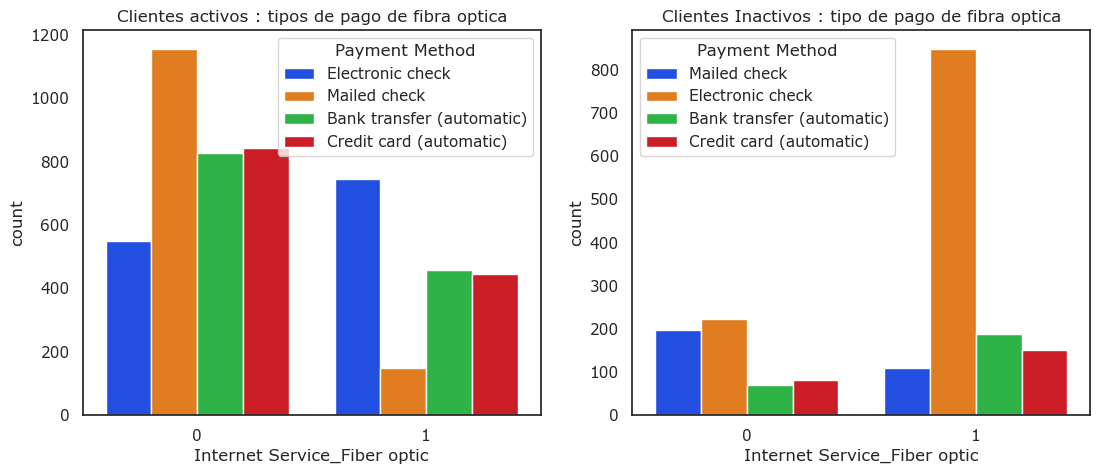

In [152]:
sns.set(style='white', palette='bright', font="Verdana", font_scale=1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.set_title("Clientes activos : tipos de pago de fibra optica")
sns.countplot(ax = ax1 , data = df_activo,
    x="Internet Service_Fiber optic",
    hue = "Payment Method")

ax2.set_title("Clientes Inactivos : tipo de pago de fibra optica")
sns.countplot(ax = ax2 , data = df_inactivo,
    x="Internet Service_Fiber optic",
    hue = "Payment Method")


Es posible que muchos clientes que nesesitan soporte tecnico no se atrevan a pedirlo y por las fallas nos dejan, ademas de que podemos tener fallas con el tipo de pago y aun no se reportan.

<AxesSubplot: title={'center': 'Clientes Inactivos |tipo de pago | Soporte tecnico'}, xlabel='count', ylabel='Payment Method'>

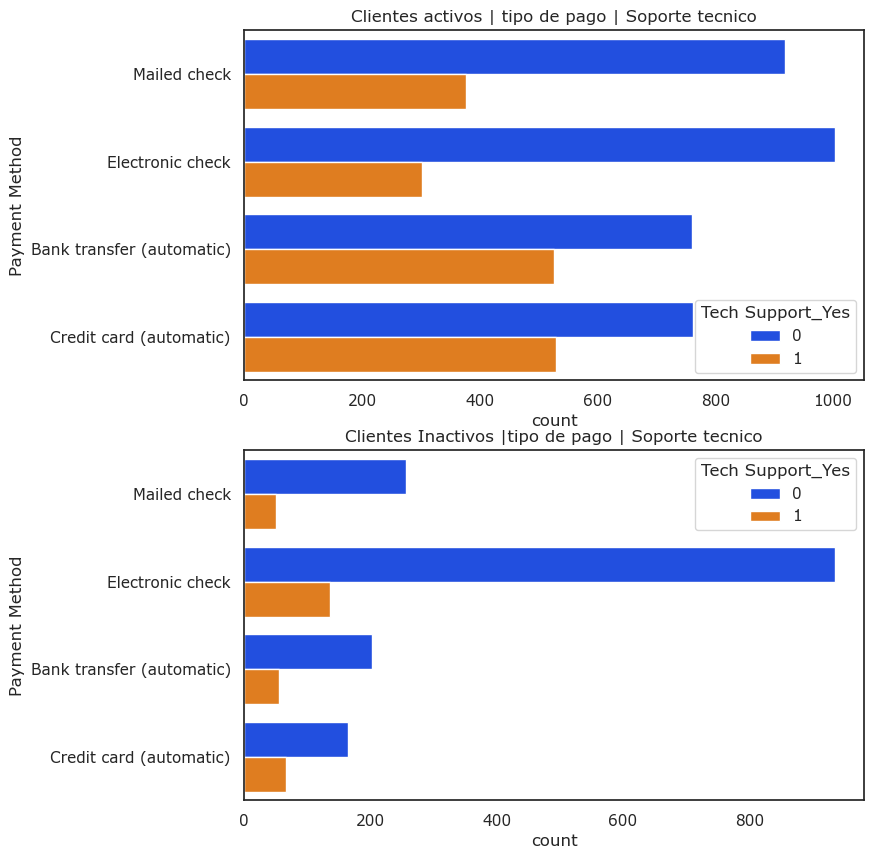

In [153]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10),sharey=True,  gridspec_kw={'wspace': 6.5} )

ax1.set_title("Clientes activos | tipo de pago | Soporte tecnico" )
sns.countplot(ax = ax1 , data = df_activo,
    y="Payment Method",
    hue = "Tech Support_Yes")

ax2.set_title("Clientes Inactivos |tipo de pago | Soporte tecnico")
sns.countplot(
    ax = ax2 , data = df_inactivo,
    y="Payment Method",
    hue = "Tech Support_Yes")


Podemos ver la diferencia entre: la relacion que tienen los diferentes servicios con el Churn y confirmamos el problema que se tiene con la fibra optica.

<AxesSubplot: title={'center': 'Clientes Inactivos :'}, xlabel='Internet Service_DSL', ylabel='count'>

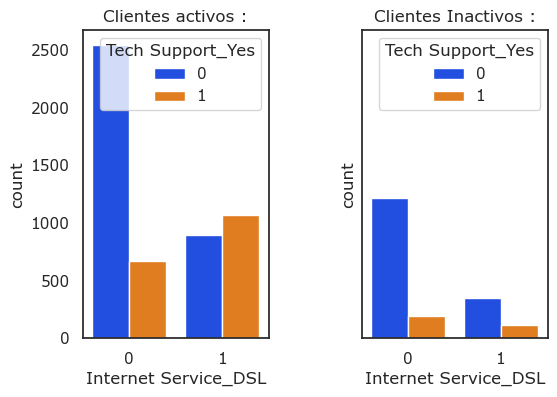

In [154]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 4),sharey=True,  gridspec_kw={'wspace': .5} )

ax1.set_title("Clientes activos :" )
sns.countplot(ax = ax1 , data = df_activo,
    x="Internet Service_DSL",
    hue = "Tech Support_Yes")

ax2.set_title("Clientes Inactivos :" )
sns.countplot( ax = ax2 , data = df_inactivo,
    x="Internet Service_DSL",
    hue = "Tech Support_Yes")

A muchos clientes que nos dejaron no se les dio soporte tecnico, de los clintes que que siguen con nosotros se les ha dado soporte tecnico a cerca de 600 y de los que nos dejaron se les ha dado soporte tecnico a 200, y a casi mil no se les dio.

<AxesSubplot: title={'center': 'Clientes Inactivos :'}, xlabel='Internet Service_Fiber optic', ylabel='count'>

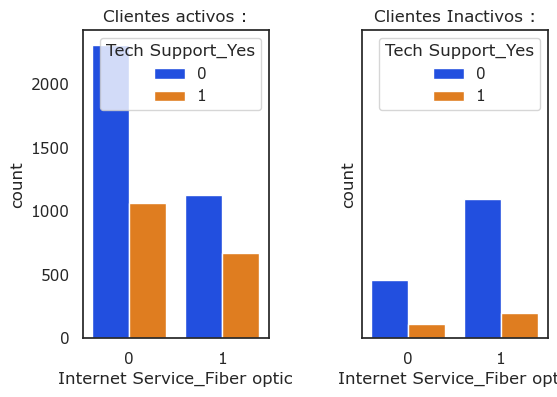

In [155]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 4),sharey=True,  gridspec_kw={'wspace': .5} )

ax1.set_title("Clientes activos :" )
sns.countplot(ax = ax1 , data = df_activo,
    x="Internet Service_Fiber optic",
    hue = "Tech Support_Yes")

ax2.set_title("Clientes Inactivos :" )
sns.countplot( ax = ax2 , data = df_inactivo,
    x="Internet Service_Fiber optic",
    hue = "Tech Support_Yes")

Sabemos que tenemos un problema, con el cheque electronico, asi que de las personas que nos dejaron analizamos si hay una diferencia con la facturacion sin papel. vemos que particularmente hay una relacion con el cheque electronico y la facturacion sin papel.

<AxesSubplot: title={'center': 'Relación de tipo de pago con la facturacion sin papel'}, xlabel='count', ylabel='Payment Method'>

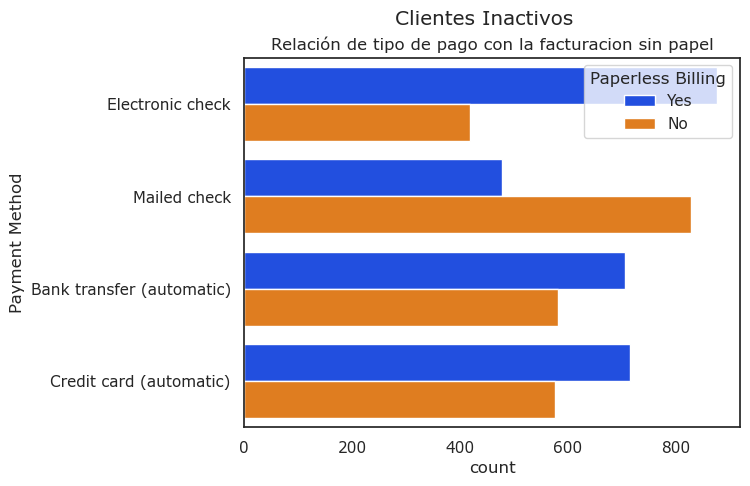

In [156]:
plt.plot()
ax = plt.gca()
ax.set_title('Relación de tipo de pago con la facturacion sin papel')
plt.suptitle('Clientes Inactivos')
sns.countplot( data =in_Comleto,
    y="Payment Method",
    hue = "Paperless Billing")

# Fidelidad

La cantidad de personas que tienen dependintes en porcentaje tienden a ser mejores clientes

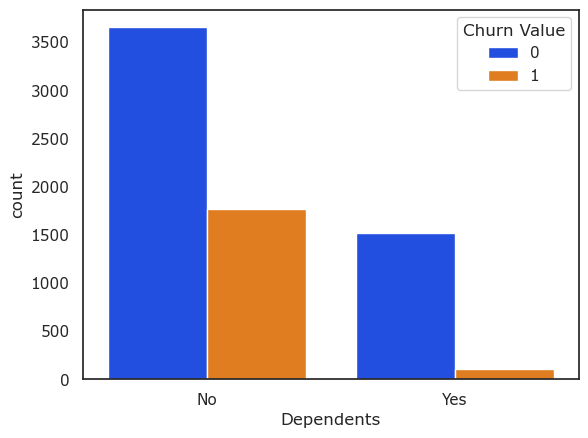

In [157]:

plt.plot()
sns.countplot(
    data = dataC,
    x="Dependents",
    hue = "Churn Value"
    )
plt.show()

Vemos las relaciones de los tipos de contrato.

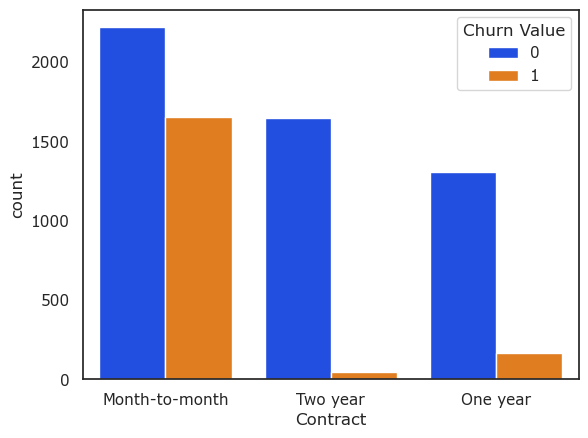

In [158]:
plt.plot()
sns.countplot(
    data = dataC,
    x="Contract",
    hue = "Churn Value"
    )
plt.show()

# Analizamos los atributos relacionados con el servicio.

Las personas que tienen seguridad en linea tienden a quedarse con nostros, en cambio el no tenerla esta relacionado con el churn del trimestre.

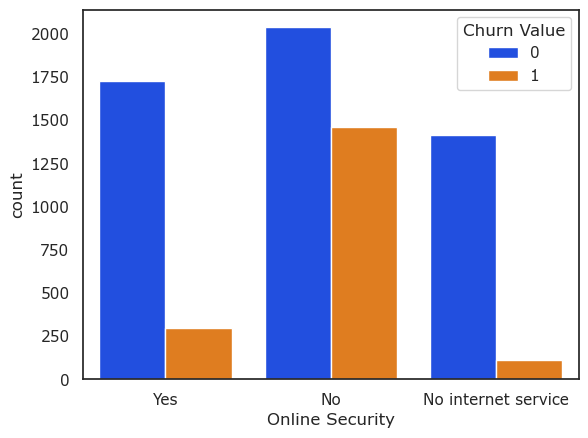

In [159]:
plt.plot()
sns.countplot(
    data = dataC,
    x="Online Security",
    hue = "Churn Value"
    )
plt.show()

# Analisis 2.2.0
__Correlaciones__